### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rv\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd

# Example using a Windows path (use a raw string 'r')
file_path = "D:/flight_price.xlsx"

# Example using a macOS/Linux path
# file_path = '/Users/YourUser/Documents/data_file.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='Sheet1') # Optionally specify a sheet name
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### descriptive stats

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#####
Statistic,Value,Notes

Count,"10,683",The total number of price observations (tickets) in the dataset.

Mean,"9,087.06",The average ticket price.

Std (Standard Deviation),"4,611.36",A measure of price variability.

Min,"1,759.00",The cheapest ticket price recorded.

Max,"79,512.00",The most expensive ticket price recorded.

50% (Median),"8,372.00","The price point that divides the data into two halves. This is lower than the mean, suggesting the data is skewed by very high-priced tickets."

25th Percentile,"5,277.00",25% of tickets are priced at or below this amount.

75th Percentile,"12,373.00",75% of tickets are priced at or below this amount.

### Data Cleaning

### check null

In [7]:
df.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.shape

(10682, 11)

In [11]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [12]:
# split date
df["date"]=df["Date_of_Journey"].str.split("/").str[0]
df["month"]=df["Date_of_Journey"].str.split("/").str[1]
df["year"]=df["Date_of_Journey"].str.split("/").str[2]

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [14]:
df["date"]=df["date"].astype(int)
df["month"]=df["month"].astype(int)
df["year"]=df["year"].astype(int)

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  date             10682 non-null  int32 
 12  month            10682 non-null  int32 
 13  year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [17]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [18]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [19]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'date', 'month',
       'year'],
      dtype='object')

In [20]:
df["Arrival_Time"]=df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [21]:
df["Arrival_hour"]=df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"]=df["Arrival_Time"].str.split(":").str[1]

In [22]:
df["Arrival_hour"]=df["Arrival_hour"].astype(int)
df["Arrival_min"]=df["Arrival_min"].astype(int)


In [23]:
df.drop("Arrival_Time",axis=1,inplace=True)


In [24]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [25]:
df.drop("Additional_Info",axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,12648,1,3,2019,14,10


In [26]:
df["Dep_hour"]=df["Dep_Time"].str.split(":").str[0]
df["Dep_min"]=df["Dep_Time"].str.split(":").str[1]

df["Dep_hour"]=df["Dep_hour"].astype(int)
df["Dep_min"]=df["Dep_min"].astype(int)

df.drop("Dep_Time",axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,2019,13,15,5,50


In [27]:
df.drop("Route",axis=1,inplace=True)

In [28]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,13,15,5,50


In [29]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'date', 'month', 'year', 'Arrival_hour', 'Arrival_min', 'Dep_hour',
       'Dep_min'],
      dtype='object')

In [30]:
df["Duration_hour"]=df['Duration'].str.split(' ').str[0].str.split('h').str[0]


In [31]:
df["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [32]:
df[~df["Duration_hour"].str.isnumeric()]

,Airline,Source,Destination,Duration,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2 stops,17327,6,3,2019,16,55,16,50,5m


In [33]:
df=df.drop(df.index[6474])

In [34]:
df[~df["Duration_hour"].str.isnumeric()]

,Airline,Source,Destination,Duration,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour


In [35]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,2019,22,25,19,55,2
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,2019,23,20,20,45,2
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,2019,11,20,8,20,3
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,2019,14,10,11,30,2


In [36]:
print("total_stops:",df["Total_Stops"].unique())
print("Airline:",df["Airline"].unique())

print("source:",df["Source"].unique())

print("Destination:",df["Destination"].unique())



total_stops: ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
Airline: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
source: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [37]:
df["total_stops"]=df["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4})
df.drop("Total_Stops",axis=1,inplace=True)
df

,Airline,Source,Destination,Duration,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,total_stops
0,IndiGo,Banglore,New Delhi,2h 50m,3897,24,3,2019,1,10,22,20,2,0
1,Air India,Kolkata,Banglore,7h 25m,7662,1,5,2019,13,15,5,50,7,2
2,Jet Airways,Delhi,Cochin,19h,13882,9,6,2019,4,25,9,25,19,2
3,IndiGo,Kolkata,Banglore,5h 25m,6218,12,5,2019,23,30,18,5,5,1
4,IndiGo,Banglore,New Delhi,4h 45m,13302,1,3,2019,21,35,16,50,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,4107,9,4,2019,22,25,19,55,2,0
10679,Air India,Kolkata,Banglore,2h 35m,4145,27,4,2019,23,20,20,45,2,0
10680,Jet Airways,Banglore,Delhi,3h,7229,27,4,2019,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,2h 40m,12648,1,3,2019,14,10,11,30,2,0


### EDA

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Arrival_hour'}>,
        <Axes: title={'center': 'Arrival_min'}>],
       [<Axes: title={'center': 'Dep_hour'}>,
        <Axes: title={'center': 'Dep_min'}>,
        <Axes: title={'center': 'total_stops'}>]], dtype=object)

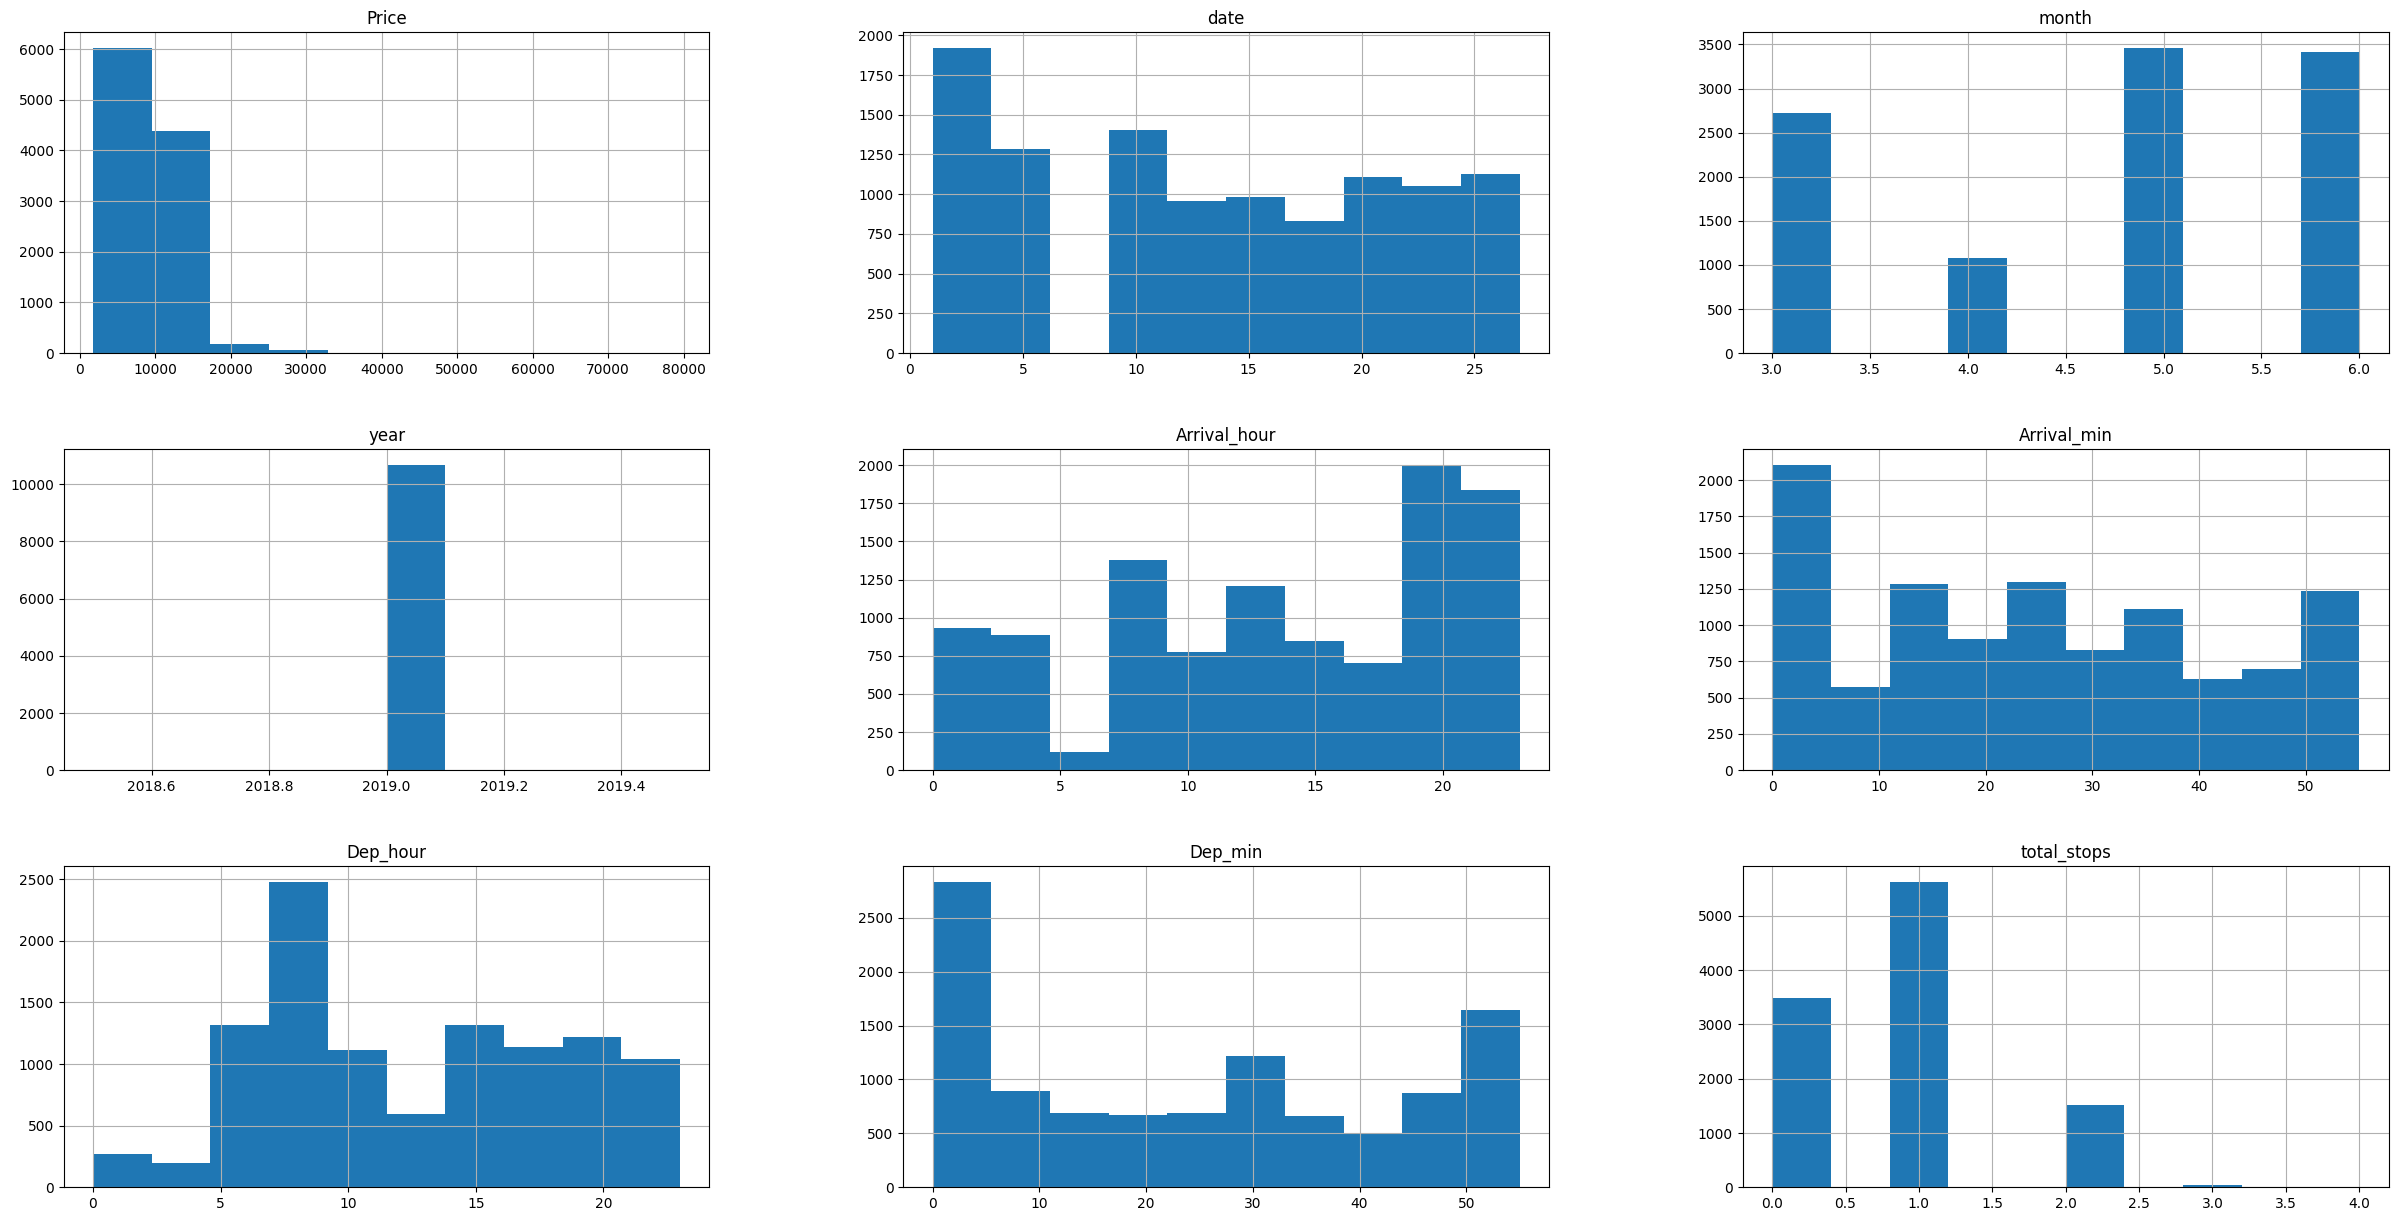

In [38]:
col=list(df[0:])
df[col].hist(stacked=False,bins=10,figsize=(30,15))

#### 
Highly skewed right. The vast majority of prices are concentrated below ₹20,000, with a small number of more expensive outliers extending towards ₹80,000.

Peaks are observed around months 3 (March), 5 (May), and 6 (June). Month 4 (April) has a lower frequency.

This suggests the data primarily belongs to a single year

The highest frequency for 0 stops (non-stop flights) and a significant peak around 1.0 stop. Frequencies drop off sharply for 2, 3, and 4 stops.

Showing peaks for early morning (around 5-7 hours) and late-night (around 22-24 hours), indicating common times for departures.

The highest concentration in late evening/night (around 22 hours) and other peaks around the morning (e.g., 6 hours).

Relatively uniform across the month, although there is a slight dip in frequency in the middle of the month (around days 10-15) and higher frequencies at the beginning and end.

<Axes: xlabel='count', ylabel='Airline'>

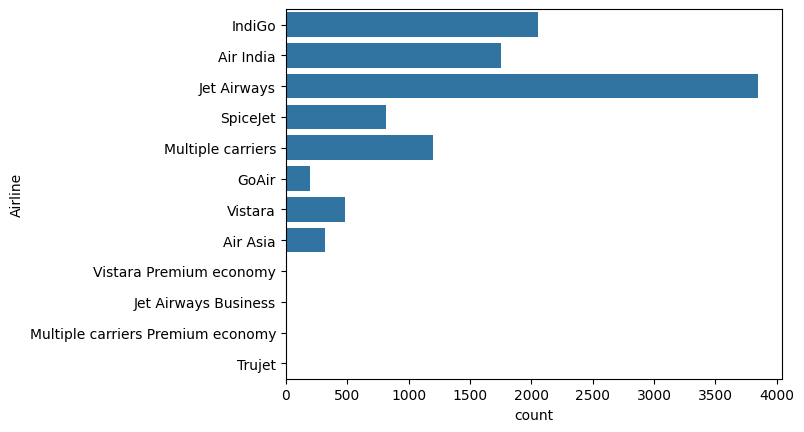

In [39]:

sns.countplot(y="Airline",data=df)

<Axes: xlabel='Price', ylabel='Count'>

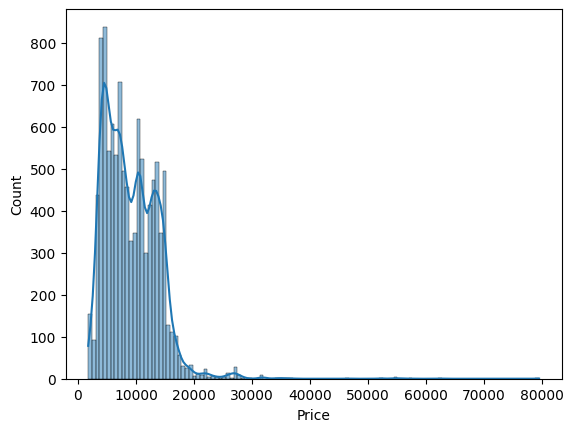

In [40]:
sns.histplot(df["Price"],kde=True)

#####
Central Tendency: The majority of prices fall below ₹20,000.

There is a dominant peak (mode) occurring between ₹3,000 and ₹7,000, where the count frequently reaches or exceeds 800.

A second, less dominant peak is visible around ₹10,000 to ₹12,000.

The distribution is multi-modal (or has a complex structure) in the lower price ranges.

Spread and Outliers:

The frequency drops off steeply after ₹20,000.

There are very few data points (outliers) that extend significantly towards the upper limit of ₹80,000, confirming the long tail characteristic of right-skewness.

<Axes: xlabel='Source', ylabel='count'>

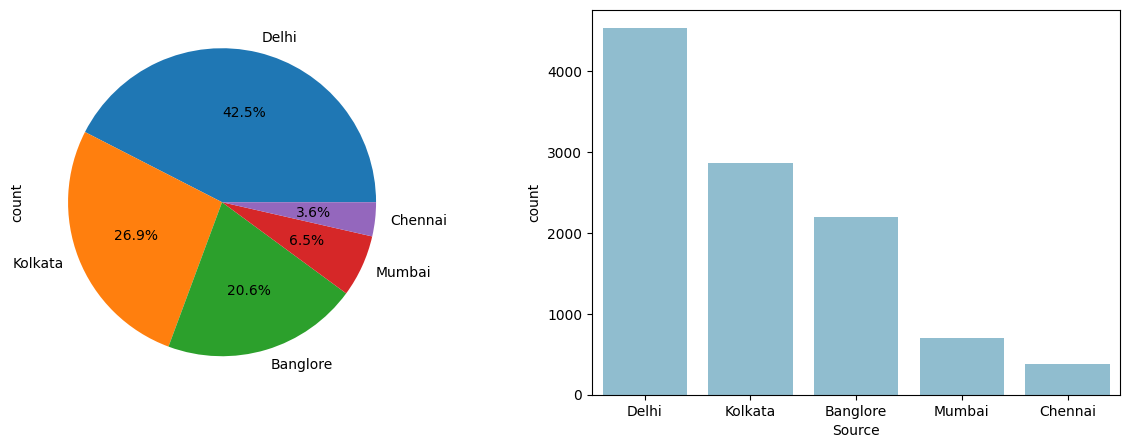

In [41]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df["Source"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[0])
sns.countplot(x="Source",data=df,ax=axes[1],color="#86C2D9",order=df["Source"].value_counts(ascending=False).index)

#####
1. ✈️ Source City Distribution
The visualizations show the distribution of flights based on their Source city:

Dominant Source: Delhi is the most frequent source city, accounting for 42.5% of all flights in the dataset, with an approximate count of 4,500.

Next Largest Sources: Kolkata is the second largest source at 26.9% (approx. 2,900 flights), followed by Bangalore at 20.6% (approx. 2,200 flights).

Least Frequent Sources: Flights originating from Mumbai (6.5%) and Chennai (3.6%) are significantly less frequent.

<Axes: xlabel='Destination', ylabel='count'>

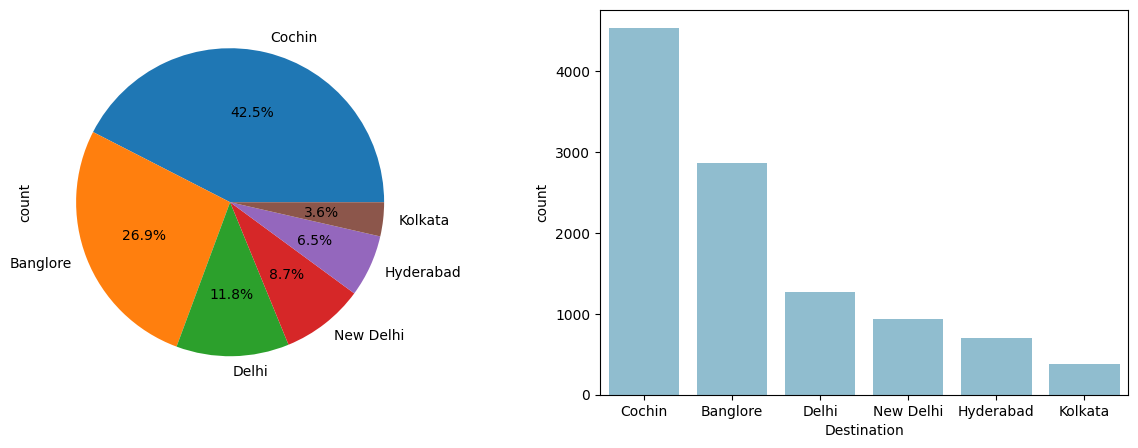

In [42]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df["Destination"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[0])
sns.countplot(x="Destination",data=df,ax=axes[1],color="#86C2D9",order=df["Destination"].value_counts(ascending=False).index)

#####
📍 Destination City Distribution
The visualizations show the distribution of flights based on their Destination city:

Dominant Destination: Cochin is the most frequent destination, accounting for 42.5% of all flights, with an approximate count of 4,500.

Next Largest Destinations: Bangalore is the second largest destination at 26.9% (approx. 2,900 flights), followed by Delhi at 11.8%.

Remaining Destinations: New Delhi (8.7%), Hyderabad (6.5%), and Kolkata (3.6%) make up the rest of the destinations.

<Axes: xlabel='total_stops', ylabel='count'>

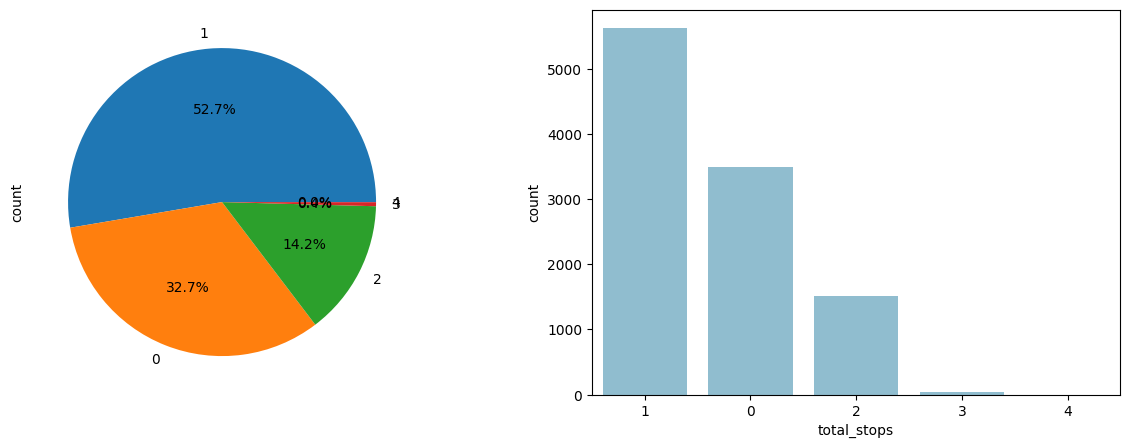

In [43]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df["total_stops"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[0])
sns.countplot(x="total_stops",data=df,ax=axes[1],color="#86C2D9",order=df["total_stops"].value_counts(ascending=False).index)

#####
🛑 Total Stops Distribution
The visualizations show the distribution of flights based on the number of total_stops:

Most Common: Flights with 1 stop are the most common, accounting for 52.7% of the dataset, with a count of approximately 5,600.

Second Most Common: Flights with 0 stops (non-stop) are the next most common at 32.7% (approx. 3,500 flights).

Less Common: Flights with 2 stops make up 14.2% (approx. 1,500 flights).

Rarest: Flights with 3 stops and 4 stops are extremely rare, making up less than 0.5% combined (not visibly present in the bar chart).

<Axes: xlabel='month', ylabel='count'>

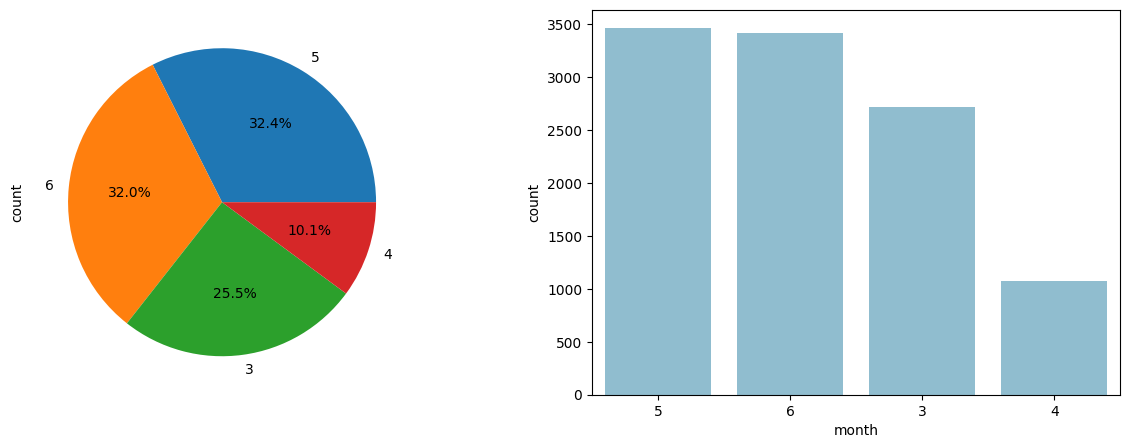

In [44]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df["month"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[0])
sns.countplot(x="month",data=df,ax=axes[1],color="#86C2D9",order=df["month"].value_counts(ascending=False).index)

#####
This visualization shows the frequency of flights across the four months present in the data (likely March, April, May, and June, represented by 3, 4, 5, and 6):

Month (Numeric),Percentage,Approximate Count

5 (May),32.4%,"≈3,450"

6 (June),32.0%,"≈3,400"

3 (March),25.5%,"≈2,750"

4 (April),10.1%,"≈1,100"

<Axes: xlabel='date', ylabel='count'>

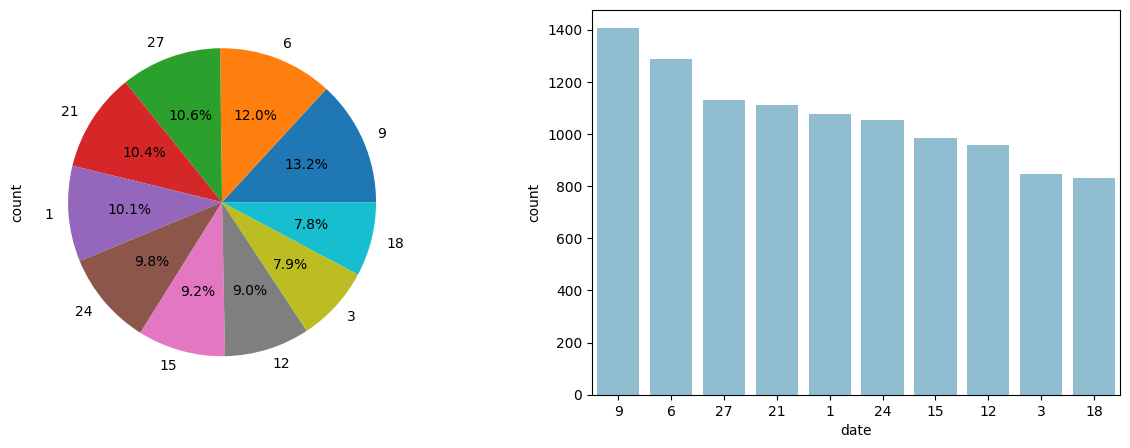

In [45]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df["date"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[0])
sns.countplot(x="date",data=df,ax=axes[1],color="#86C2D9",order=df["date"].value_counts(ascending=False).index)

#####
The highest flight counts are observed on days 9 (13.2%, $\approx 1,400$), 6 (12.0%, $\approx 1,300$), and 27 (10.6%, $\approx 1,150$).Flight counts tend to be lower on the 3rd and 12th of the month.

<Axes: xlabel='Price', ylabel='Airline'>

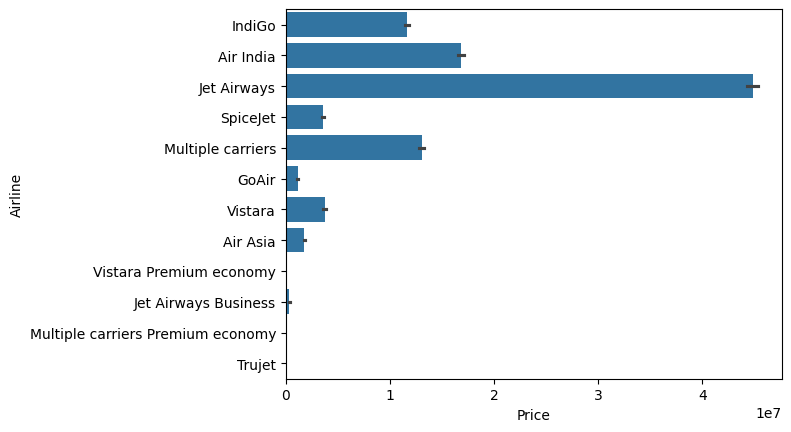

In [47]:
sns.barplot(data=df, x="Price", y="Airline",estimator="sum")

#####
Dominant Airline: Jet Airways has the highest total accumulated price by a significant margin, with a value exceeding $4 \times 10^7$ (40 million).

Second Highest: Air India has the second-highest total price, followed closely by Multiple carriers, both falling in the range of approximately $1.5 \times 10^7$ to $2 \times 10^7$ (15-20 million).

Other Major Carriers: IndiGo also shows a substantial total price, close to $1 \times 10^7$ (10 million).

Smaller Totals: Airlines like Spicejet, Vistara, GoAir, and Air Asia have comparatively smaller total prices, all below $1 \times 10^7$.
Negligible Totals: Specialized or smaller categories like Vistara Premium economy, Jet Airways Business, Multiple carriers Premium economy, and Trujet show very low total accumulated prices, barely visible on the scale.

The plot suggests that Jet Airways is either the most frequently booked airline or has the highest fares, leading to the largest overall sum in the dataset.

<Axes: xlabel='Price', ylabel='Airline'>

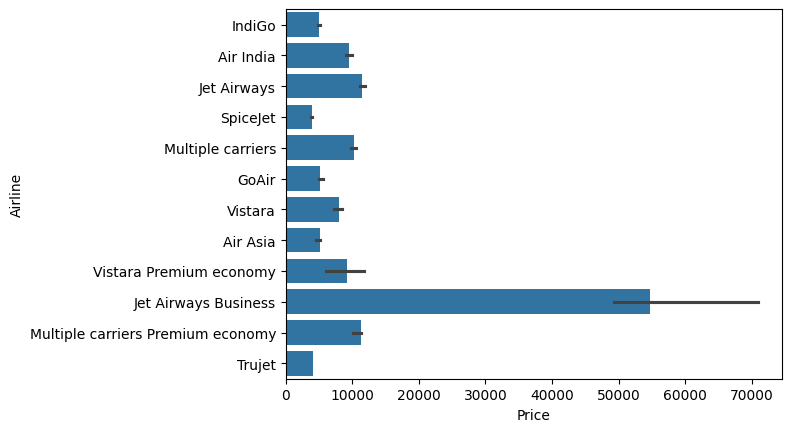

In [48]:
sns.barplot(data=df, x="Price", y="Airline",estimator=np.median)

#####
The two plots show a crucial difference between total accumulation and individual ticket cost:Total Price (First Plot):

Jet Airways (Standard/Economy) had the highest total accumulated price (over $40$ million), suggesting it has the highest volume of bookings in the dataset.

Median Price (Second Plot): Jet Airways Business has the highest typical (median) price per ticket ($\sim 55,000$).

## suammry of price vs airline in Boxplot,barplot and skewness

#### The bar plot reveals how individual airlines contribute to the overall price distribution.
#### Highest Median Price: 
#### Jet Airways Business has a median price ($\sim 55,000$) significantly higher than the overall dataset maximum 75th percentile ($12,373$). 
#### This category contains the most expensive tickets, driving the overall 'Max' price of $79,512$.
#### Mid-Range Carriers (Median $\sim 10,000$ to $12,000$):
#### Air India, Jet Airways (Economy/General), Multiple carriers, Vistara, Vistara Premium economy, and Multiple carriers Premium economy all fall into this tier. Their median prices are close to the overall 75th percentile ($12,373$), indicating they represent the more expensive $25\%$ of typical bookings.
#### Budget Carriers (Median $\sim 5,000$ to $7,000$):
#### IndiGo, Spicejet, GoAir, Air Asia, and Trujet cluster in the most affordable tier. Their median prices are close to the overall 25th percentile ($5,277$), suggesting they represent the bulk of budget-friendly bookings.
#### Skewness: 
#### The presence of the Jet Airways Business category (with a median of $\sim 55,000$) significantly pulls the overall Mean price ($9,087$) higher than the overall Median price ($8,372$).

### Feature Enginering

In [52]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [53]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
encoder=OneHotEncoder()

In [62]:
encoder.fit_transform(df[["Airline","Source","Destination"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [65]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
